<b>
Завдання прогнозування залежностей<br>
Регресійний аналіз із поділом змінних змінних<br>
Множинна регресія (множина регресія)
</b>


Множинна регресія ймовірності виникнення відразу виявляється однією залежною.

<b>Вимоги до даних</b>

<li>лінійна залежність змінних
<li>нормальний розподіл залишків
<li>гомоскедастичність даних
<li>перевірка на мультиколіарність
<li>нормальний розподіл змінних (бажано)

<b>Приклад розрахунку та візуалізації множинної регресії</b>

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import statsmodels.formula.api as smf

df = pd.read_csv('states.csv')

# Побудуємо площину передбачення
lm = smf.ols(formula='poverty ~ white + hs_grad', data=df).fit()
mesh_size = 1.0
margin = 2.0
x_min, x_max = df.white.min()- margin, df.white.max() + margin
y_min, y_max = df.hs_grad.min()- margin, df.hs_grad.max() + margin
z_pred = lambda x, y: lm.params.white * x + lm.params.hs_grad * y + lm.params.Intercept
x_range = np.arange(x_min, x_max, mesh_size)
y_range = np.arange(y_min, y_max, mesh_size)
z_range = np.array([[z_pred(x, y) for x in x_range] for y in y_range])

# які значення вище передбачення, а які нижче
df['poverty_pred'] = np.array([poverty >= z_pred(df.white[i], df.hs_grad[i]) for i, poverty in df.poverty.items()])

# складемо графік
fig = px.scatter_3d(df, x='white', y='hs_grad', z='poverty',
                     color='poverty_pred', color_discrete_sequence=['red', 'green'],
                    title='залежність відсотка білого населення та рівня освіти на бідність населення')
fig.update_traces(marker=dict(size=3))
fig.add_traces(go.Surface(x=x_range, y=y_range, z=z_range, name='prediction', opacity=0.8))
fig.show()

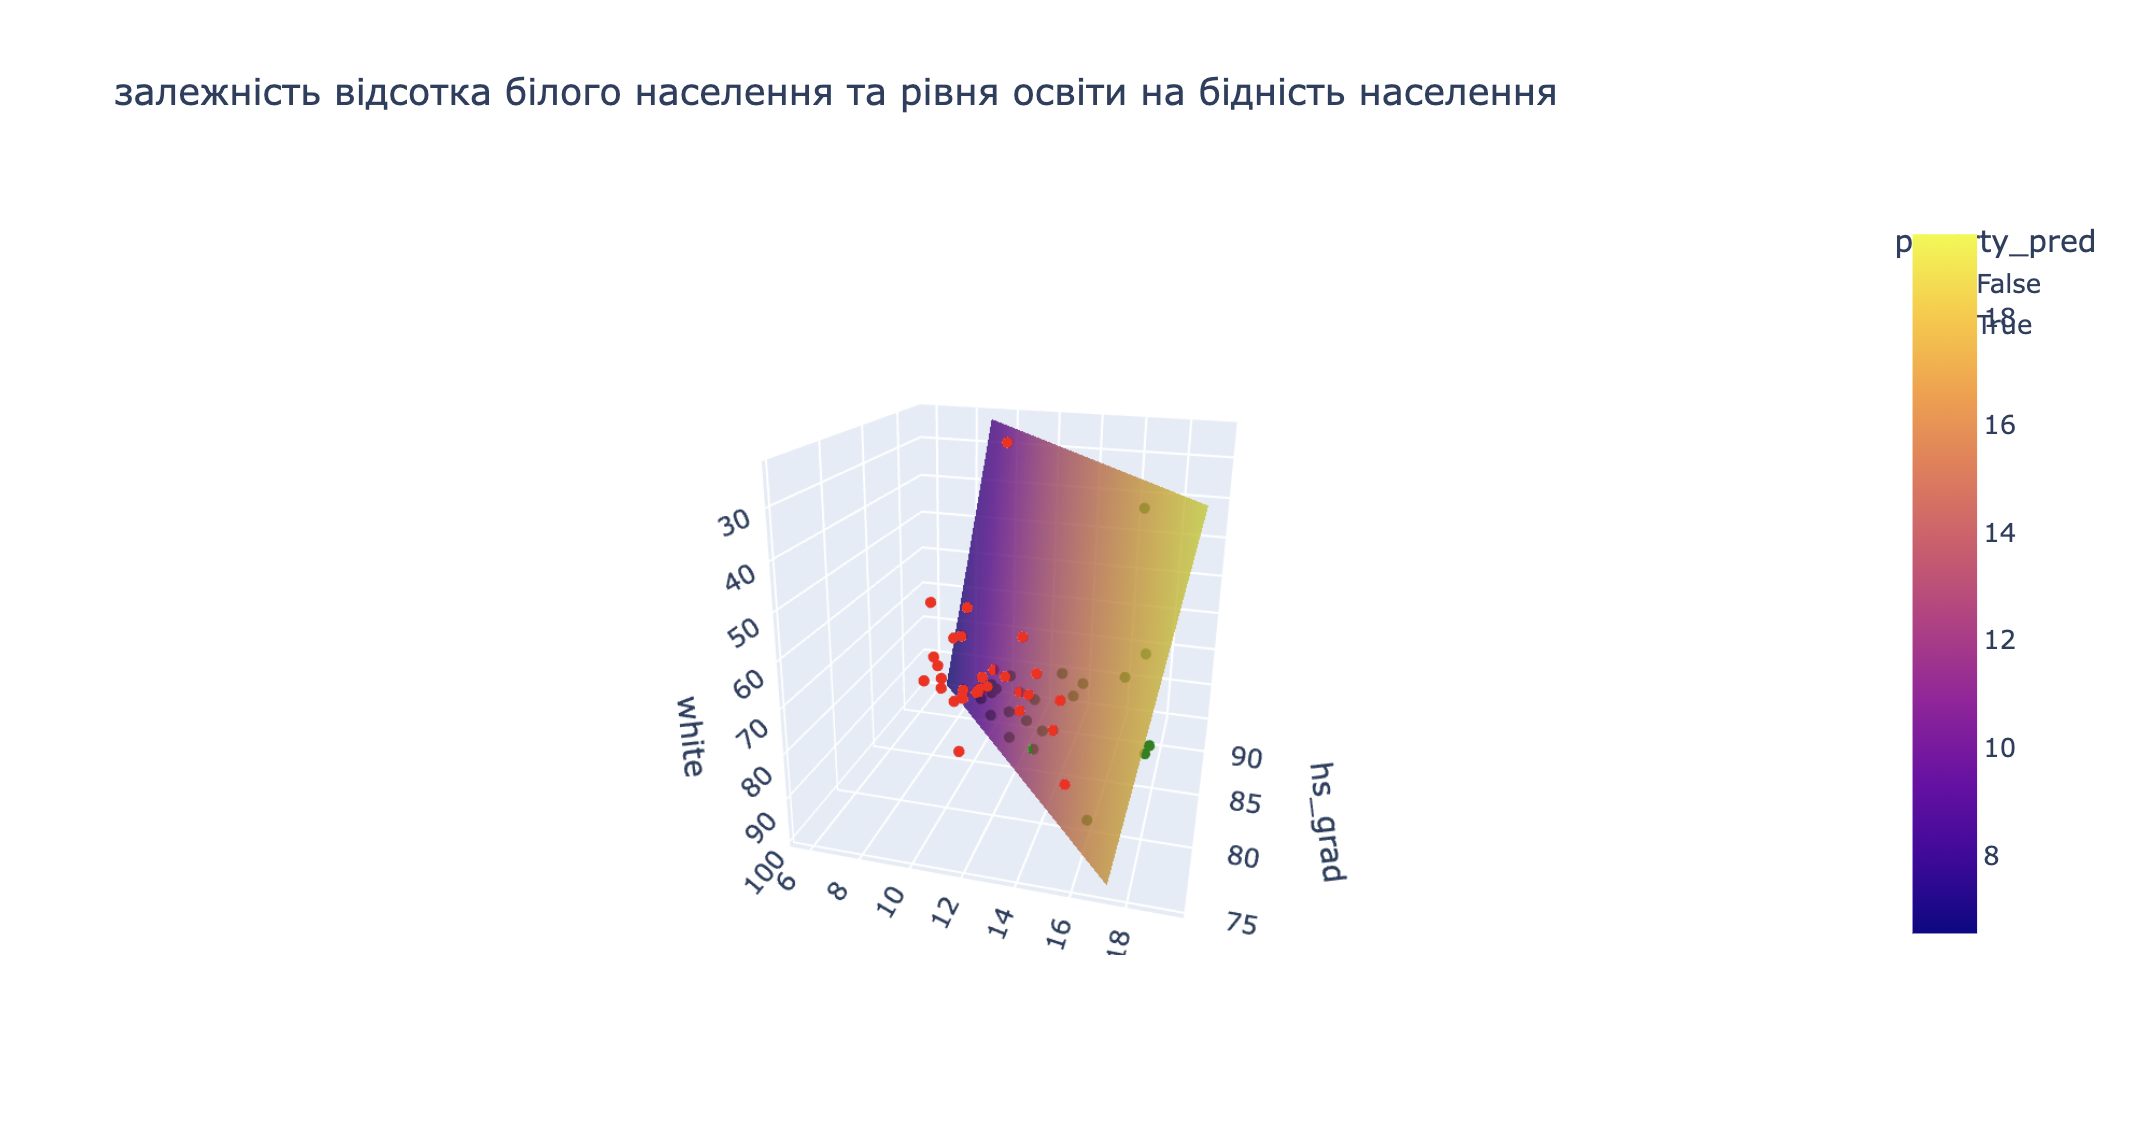